In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

display(train.head())
display(train.describe())
display(train.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

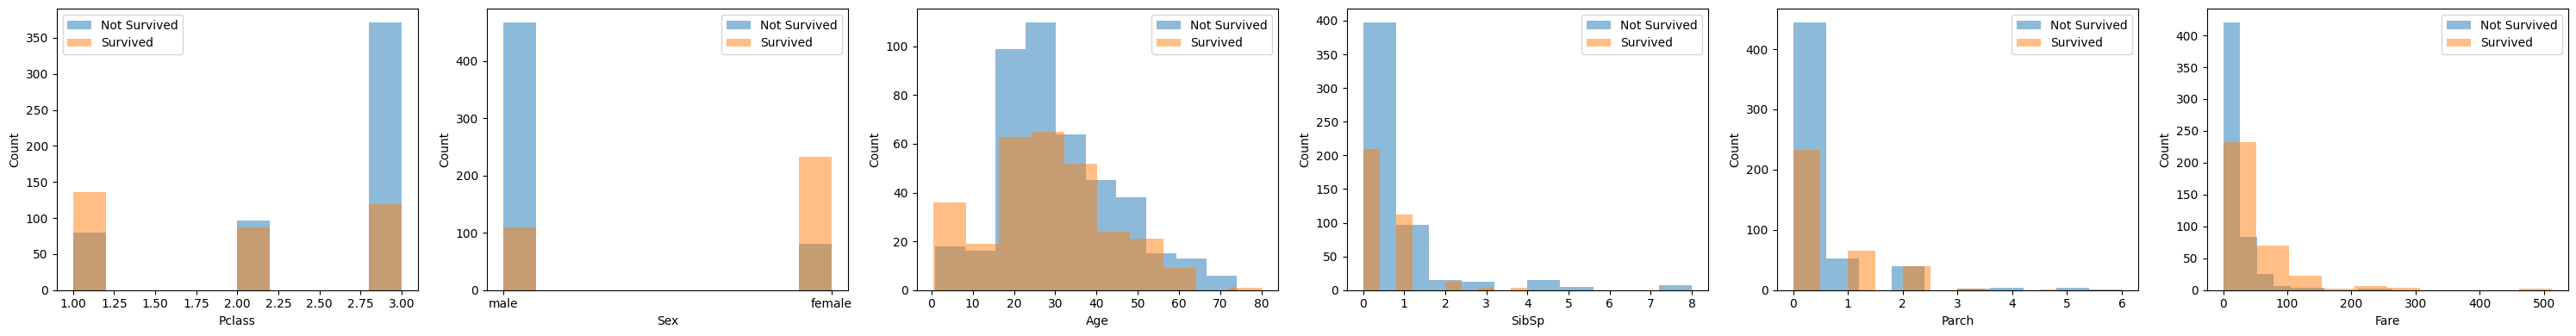

In [2]:
import matplotlib.pyplot as plt
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
y = train['Survived']

fig, ax = plt.subplots(1, len(X.columns), figsize=(5 * len(X.columns), 4))

for i, col in enumerate(X.columns):
    ax[i].hist(X[y == 0][col].dropna(), alpha=0.5, label='Not Survived')
    ax[i].hist(X[y == 1][col].dropna(), alpha=0.5, label='Survived')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')
    ax[i].legend()

plt.tight_layout()
plt.show()


In [3]:
# Data cleaning
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Family Size'] = X['SibSp'] + X['Parch']
X['Alone'] = X['Family Size'] == 0
X['Sex'] = pd.get_dummies(X['Sex'], drop_first=True)

X.drop(columns=['SibSp', 'Parch'], inplace=True)

X.head()


,Pclass,Sex,Age,Fare,Family Size,Alone
0,3,True,22.0,7.2500,1,False
1,1,False,38.0,71.2833,1,False
2,3,False,26.0,7.9250,0,True
3,1,False,35.0,53.1000,1,False
4,3,True,35.0,8.0500,0,True


In [4]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_dev)

acc = accuracy_score(y_dev, y_pred)
print(f'Logistc regression accuracy: {acc}')

report = classification_report(y_dev, y_pred)
print(f'Logistic regression classification report: \n{report}')

Logistc regression accuracy: 0.7988826815642458
Logistic regression classification report: 
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [5]:
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier(n_estimators=100, max_depth=4)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_dev) 
print(f'GradientBoostingClassifier accuracy: {accuracy_score(y_dev, y_pred)}')


GradientBoostingClassifier accuracy: 0.8156424581005587


In [6]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_dev)
print(f'RandomForestClassifier accuracy: {accuracy_score(y_dev, y_pred)}')

RandomForestClassifier accuracy: 0.8156424581005587


In [9]:
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

X_test['Age'] = X_test['Age'].fillna(X['Age'].median()) 
X_test['Family Size'] = X_test['SibSp'] + X_test['Parch']
X_test['Alone'] = X_test['Family Size'] == 0
X_test['Sex'] = pd.get_dummies(X_test['Sex'], drop_first=True)

X_test['Fare'] = X_test['Fare'].fillna(X['Fare'].median())

X_test.drop(columns=['SibSp', 'Parch'], inplace=True)

print(f"Test data shape: {X_test.shape}")
print(f"Missing values:\n{X_test.isnull().sum()}")
X_test.head()

Test data shape: (418, 6)
Missing values:
Pclass         0
Sex            0
Age            0
Fare           0
Family Size    0
Alone          0
dtype: int64


,Pclass,Sex,Age,Fare,Family Size,Alone
0,3,True,34.5,7.8292,0,True
1,3,False,47.0,7.0000,1,False
2,2,True,62.0,9.6875,0,True
3,3,True,27.0,8.6625,0,True
4,3,False,22.0,12.2875,2,False


In [10]:
final_model = GradientBoostingClassifier(n_estimators=100, max_depth=4, random_state=42)
final_model.fit(X, y)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [11]:
# Make predictions on test set
y_pred = final_model.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
